<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/04_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.4 Rainfall
Often, we are given a rainfall recorded by a rain gauge which provides the rainfall depths recorded
for successive interval in time, and we want to compute the cumulative rainfall. In this example first
we shall create rainfall using the random numbers, and we shall also create time variable having
values [0,5,10, ...., 100].

In [7]:
import numpy as np
time = np.linspace(0,100,21) # create time variable
print(time)

rainfall = np.random.rand(21) # generate rainfall
print(rainfall)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
[0.02276488 0.75542823 0.43092886 0.88481388 0.41044052 0.75200369
 0.07323813 0.36800546 0.95668845 0.39954    0.19557684 0.66412831
 0.09269119 0.14747645 0.5021737  0.8434781  0.14245455 0.33039849
 0.76478078 0.90601023 0.0845472 ]


Now we make a bar plot using the plt.bar(), for the rainfall which depicts temporal behaviour of
the rainfall.

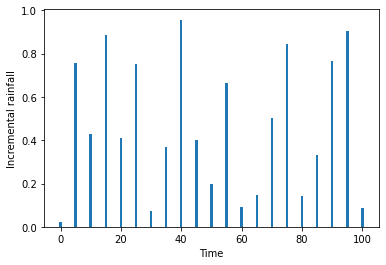

In [8]:
import matplotlib.pyplot as plt

plt.bar(time,rainfall)
plt.xlabel('Time')
plt.ylabel('Incremental rainfall')
plt.show()

We can use *plt.savefig* to store the file in our system. The plt.show() shows the graph on computer screen, which can be saved later, while the plt.savefig() saves the graphs in computer, which can be viewed after opening the file. It is just matter of taste, what you like, optionally both can be done on same graph. I prefer to just display when working in *Google colab*, but when I am working locally in my system, I prefer to save the figures in the computer and then see them.

The cumulative sum is calculated by using the cumsum function of the numpy library.

In [9]:
cum_rainfall = np.cumsum(rainfall)
print(cum_rainfall)

[0.02276488 0.77819311 1.20912198 2.09393585 2.50437637 3.25638006
 3.3296182  3.69762366 4.65431211 5.05385211 5.24942894 5.91355725
 6.00624844 6.15372489 6.65589859 7.49937669 7.64183123 7.97222972
 8.7370105  9.64302072 9.72756792]


Now we plot the cumulative rainfall. The resulted cumulative rainfall is shown below. The *plt.clf()* clears the current figure, and is quiet useful when making multiples plots, and there is any existing plot in the python memory. Just don’t use the *clf* if you are working in your system locally, and notice the difference.

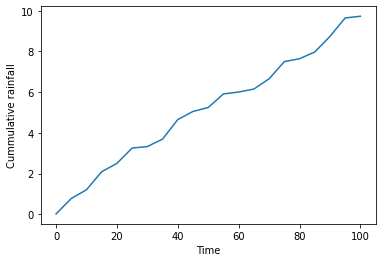

In [10]:
plt.clf()
plt.plot(time,cum_rainfall)
plt.xlabel('Time')
plt.ylabel('Cummulative rainfall')
plt.show()

Usually, we are given the rainfall at some rain gauges, and we want to make the isohyete (contour) plot of the rainfall. To demonstrate this situation, fist we shall generate locations (x,y) and rainfall for ten stations using random numbers. The generated locations of the rain gauges is shown below.

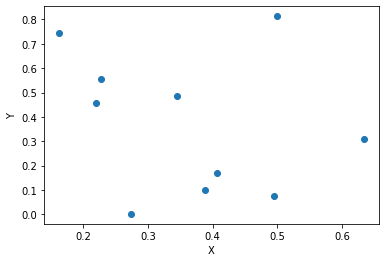

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#genrate locations and rainfall
x = np.random.rand(10)
y = np.random.rand(10)
rain = 10*np.random.rand(10)

#plot the locations
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

I prefer to add blank lines after a section of code, and comment on the top of section what it is doing. This increases the readability of the code. The plt.scatter() makes the scatter plot, i.e. the dots are plotted instead of lines. When there is no order in the data with respect to their position in the array, then scatter plot is used. Like in this case, it is possible that two stations which are close by, but might be placed at distant in the array.

The flow chart of preparing contour map is given below:

![](https://drive.google.com/uc?export=view&id=1oafFajTx03xaRL-QN_9HLPNxSx3UVNgq)

First, we need to generate the grid with regular spacing having the same extent as of the locations of rainfall gauges. Then,
from the given location and rainfall data, we need to compute data at regular grid using some interpolation scheme. After this contour maps can be obtained. The griddata function of the
scipy.interpolate library is useful in obtaining the gridded data (data at regular grid). When we need only one or few functions from the library, it is better to call them explicitly, e.g. from scipy.interpolate import griddata, like in the following example. We use *meshgrid* function of *numpy* library, to create the mesh from the given $x$ and $y$ vectors.



In [12]:
from scipy.interpolate import griddata

#generate the desired grid, where rainfall is to be interpolated
X,Y = np.meshgrid(np.linspace(0,1,1000), np.linspace(0,1,1000))

#perform the gridding
grid_rain = griddata((x,y), rain, (X, Y))

Now, we can make the contour plot of the gridded data, which is made by *plt.contourf()* function. The contourf makes filled contours, while contour() provides simple contour. Try using the
contour instead of contourf, and you will see the difference. We begin by clear current figure by using the plt.clf(), as there might be some existing figure in the memory especially if you are following all the examples in the same session. We are also overlaying the locations of rainfall gauges using the plt.scatter(). The s and c are used to define the size and color of the markers respectively. The plt.xlim() and plt.ylim() limits the extent of the x and y axis respectively.

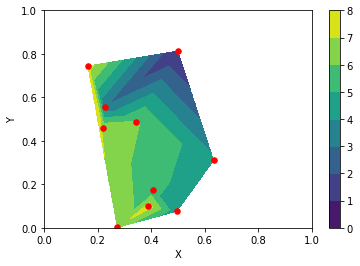

In [14]:
plt.contourf(X,Y,grid_rain)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y, s=30, c='r')